**Task 1 - Prediction using Supervised ML**

**Author**: **Nikita Paliwal**

**Data Science & Business Analytics Intern at The Spark Foundation**



**Aim** : Predict the percentage of students based on no. of study hours using Linear  Regression and also predict the score if a student studies for 9.25 hours per day.



## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

**Dataset**

The given dataset has two Columns, one contains no.of study hours and the other one contains the marks scored by him. The dataset can be found at http://bit.ly/w-data



**Importing required libraries**

In [1]:
import pandas as pd     
import numpy as np    
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

**Loading and reading the dataset**

In [2]:
data = pd.read_csv('/content/dataset.csv')
print('*Successfully imported data*')
data.head(10)

*Successfully imported data*


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Shows no of rows and columns**

In [4]:
data.shape

(25, 2)

In [5]:
data.size

50

**Information of the dataset**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Data Visualisation**

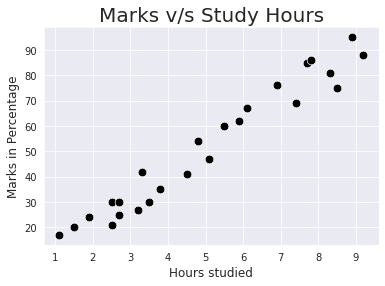

In [7]:
sns.set_style('darkgrid')
sns.scatterplot(x=data['Hours'], y=data['Scores'], color='Black',s=75)
plt.title('Marks v/s Study Hours',size=20)
plt.ylabel('Marks in Percentage', size=12)
plt.xlabel('Hours studied', size=12)
plt.show()

**From the above scatter plot there looks to be correlation between the 'Marks Percentage' and 'Hours Studied', Lets plot a regression line to confirm the correlation.**


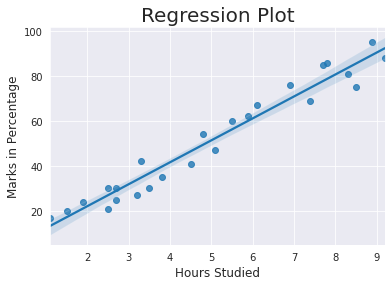

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [8]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks in Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data.corr())


**It is confirmed that the variables are positively correlated.**



**Training the Model**






**1. Splitting of data**

In [18]:
# Defining X and y from the Data
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# Spliting the Data in two
x_train, x_val, y_train, y_val = train_test_split(x, y, random_state = 0)

**2. Fitting the Data into the model**


In [19]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("**Training OF MODEL completed**")


**Training OF MODEL completed**


**Predicting the Percentage of Marks**


In [20]:
pred_y = regressor.predict(x_val)
prediction = pd.DataFrame({'Hours': [i[0] for i in x_val], 'Predicted Marks': [k for k in pred_y]})
prediction


,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


**Comparing the Predicted Marks with the Actual Marks**


In [21]:
compare_scores = pd.DataFrame({'Actual Marks': y_val, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


**Visually Comparing the Predicted Marks with the Actual Marks**


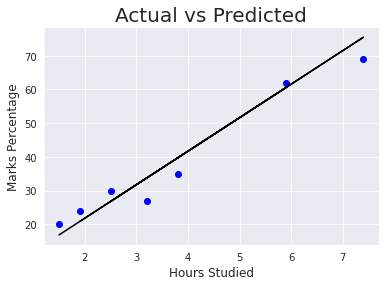

In [22]:
plt.scatter(x=x_val, y=y_val, color='blue')
plt.plot(x_val, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()


In [23]:
print('**Train Score**')
print(regressor.score(x_train,y_train))


**Train Score**
0.9484509249326872


In [24]:
print('**Test Score**')
print(regressor.score(x_val,y_val))


**Test Score**
0.9367661043365056


**Evaluating the Model**


In [25]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(y_val,pred_y))


Mean absolute error:  4.130879918502482


**Small value of Mean absolute error states that the chances of error through the model are very less.**



**The predicted score if a student studies for 9.25 hrs/ day.**



In [26]:
hours = [9.25]
answer = regressor.predict([hours])
print("Predicted Percentage = {}".format(round(answer[0],3)))


Predicted Percentage = 93.893


So according to the regression model if a student studies for 9.25 hours a day he/she is likely to score **93.89 %** marks.